In [59]:
import numpy as np
import nibabel as nib
from nilearn.image import reorder_img, resample_img

import glob

In [3]:
def resample_voxel(data_nib, voxelsize, target_shape=None, interpolation='continuous'):
    affine = data_nib.affine
    target_affine = affine.copy()

    factor = np.zeros(3)
    for i in range(3):
        factor[i] = voxelsize[i] / \
            np.sqrt(affine[0, i]**2 + affine[1, i]**2 + affine[2, i]**2)
        target_affine[:3, i] = target_affine[:3, i]*factor[i]

    new_nib = resample_img(data_nib, target_affine=target_affine,
                           target_shape=target_shape, interpolation=interpolation)

    return new_nib

In [14]:
input_nib = nib.load(r'CC0002_philips_15_56_M.nii.gz')
input_nib_resp = reorder_img(input_nib)
vol = input_nib_resp.get_fdata()

In [92]:
def remove_lower(vol, ratio=0.1):
    height = vol.shape[-1]
    for h in range(height):
        if np.sum(vol[:, :, h]) > 0:
            lower = h
            break
            
    for h in range(height - 1, -1, -1):
        if np.sum(vol[:, :, h]) > 0:
            upper = h
            break
    
    remove_line = int((upper - lower) * ratio)
    print(remove_line)
    output = vol * 1
    output[:, :, 0:remove_line] = 0
    return output

In [90]:
output = remove_lower(vol)

61


In [57]:
from tool import show_slices

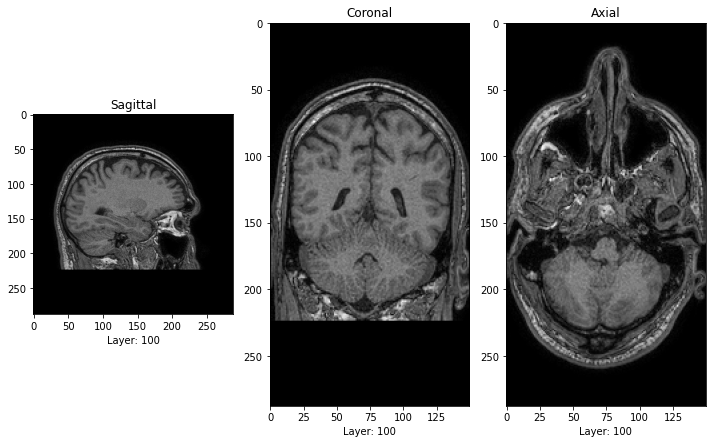

In [58]:
show_slices(output, (100, 100, 100), 'gray')

26


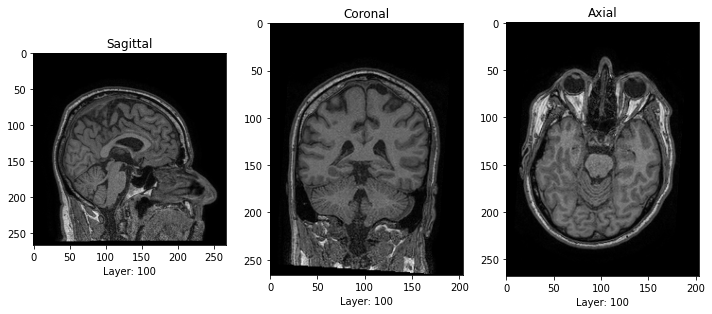

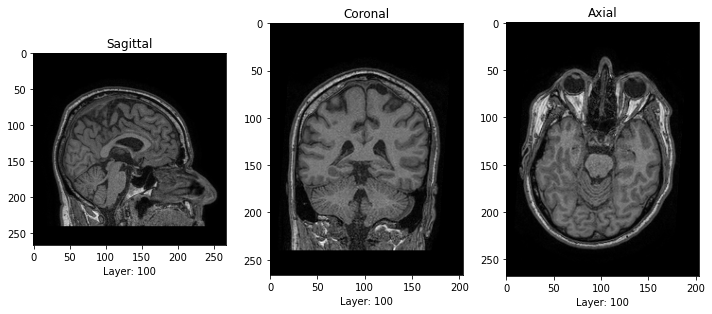

25


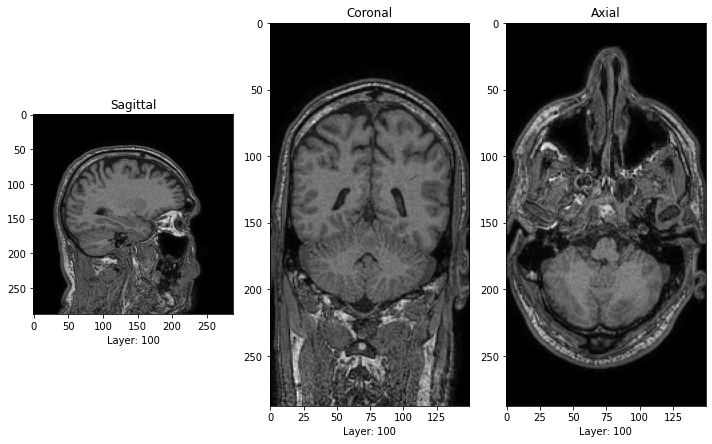

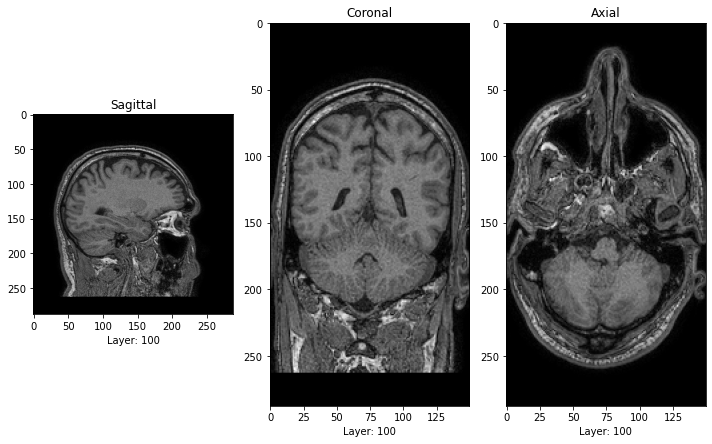

29


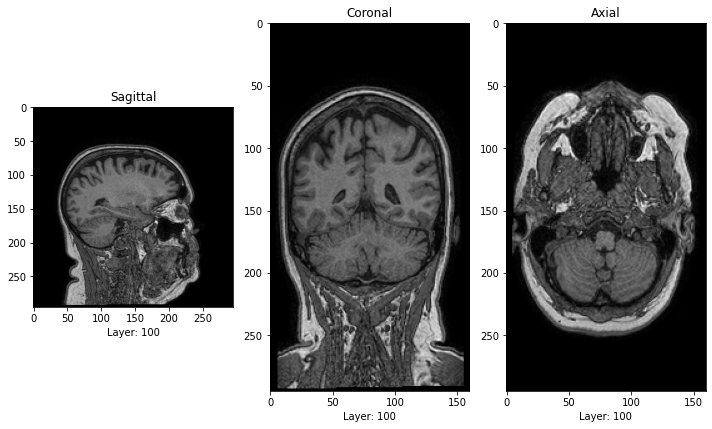

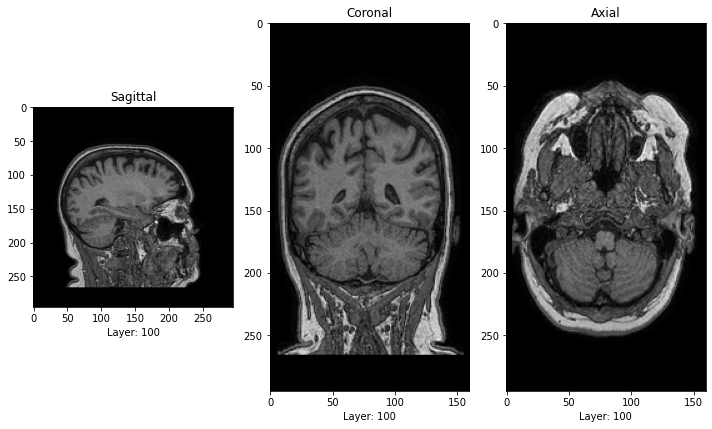

31


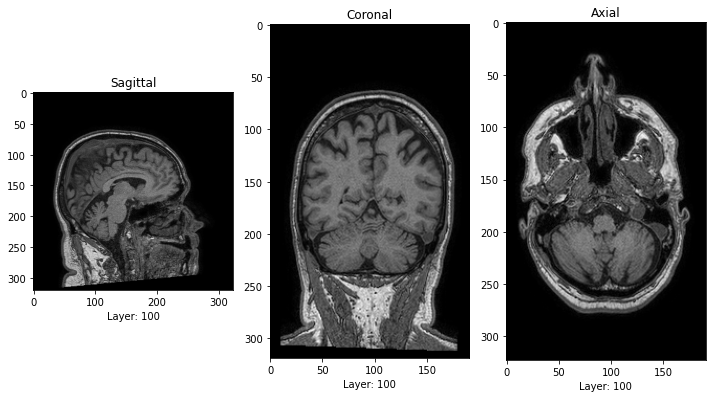

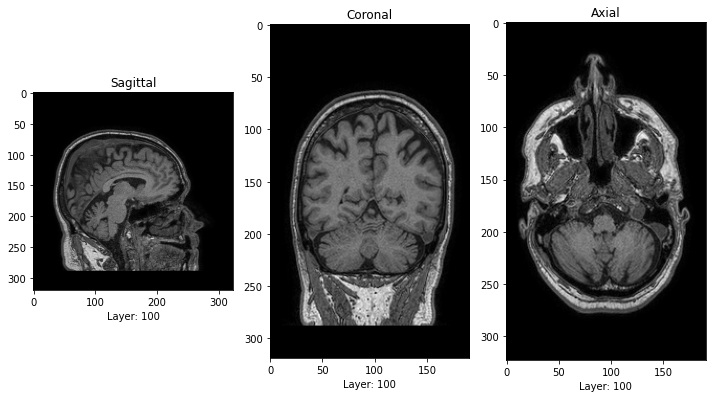

29


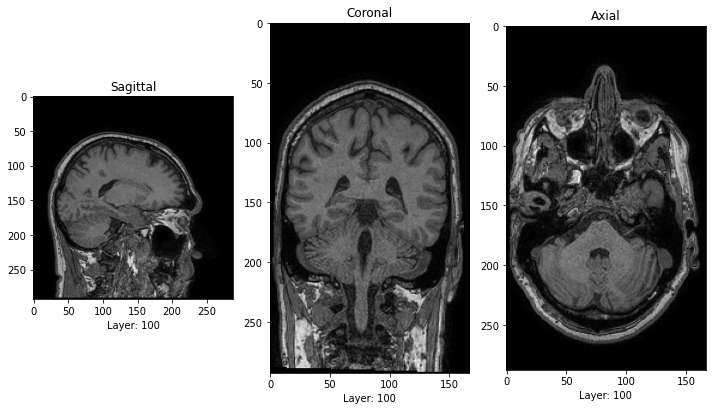

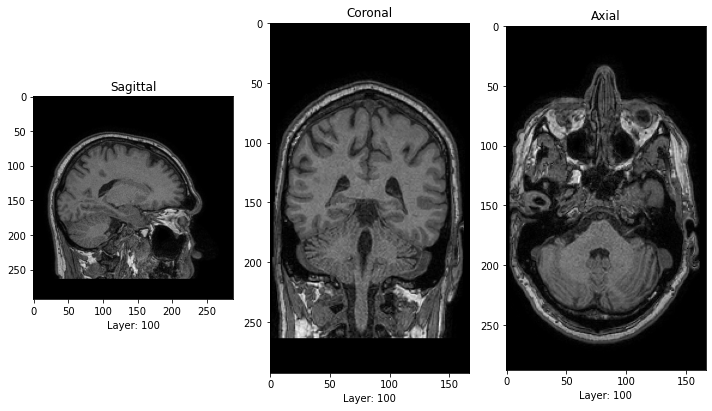

KeyboardInterrupt: 

In [93]:
input_ffs = glob.glob(r'D:\synthseg_pc\dataset\cc359\Original\*.nii.gz')
for f in input_ffs:
    input_nib = nib.load(f)
    input_nib_resp = reorder_img(input_nib, resample='continuous')
    
    vol = input_nib_resp.get_fdata()
    
    output = remove_lower(vol)
    
    show_slices(vol, (100, 100, 100), 'gray')
    show_slices(output, (100, 100, 100), 'gray')

In [84]:
reorder_img(nib.load(f'D:\synthseg_pc\dataset\cc359\Original\CC0001_philips_15_55_M.nii.gz'), )